In [181]:
import os
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, random_split, DataLoader
from PIL import Image
import torchvision.models as models
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torch.nn as nn
import torchvision.datasets as datasets
from torchvision.utils import make_grid

In [182]:
normalize=T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = T.Compose([
    T.RandomHorizontalFlip(), 
    T.RandomRotation(10),
    T.ToTensor(),
    normalize
])
batch_size=64

In [192]:
train=datasets.CIFAR10(root='./',train=True,download=True,transform=transform)
test=datasets.CIFAR10(root='./',train=False,transform=T.Compose([T.ToTensor(),normalize]))

Files already downloaded and verified


In [184]:
print(len(train))
print(len(test))

50000
10000


In [191]:
trainloader=DataLoader(train,shuffle=True,batch_size=batch_size,num_workers=0)
testloader=DataLoader(test,shuffle=False,batch_size=batch_size,num_workers=0)

In [186]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)

'Tesla T4'

In [187]:
def show_batch(dl, invert=False):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        data = 1-images if invert else images
        ax.imshow(make_grid(data, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


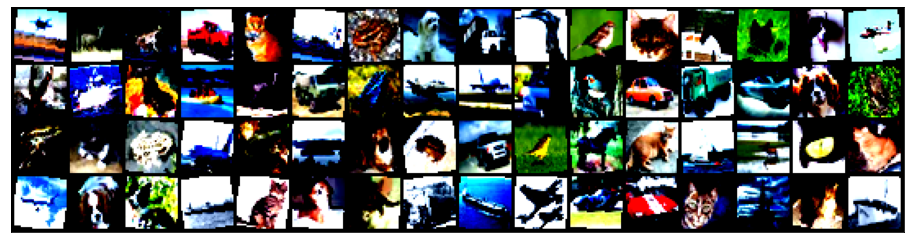

In [188]:
show_batch(trainloader)

In [210]:
model=models.resnet18(pretrained=True).to(device)

In [211]:
for param in model.parameters():
    param.requires_grad = False

In [215]:
model.fc = nn.Sequential(
               nn.Linear(512, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 10)).to(device)

In [216]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [225]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.01)

In [ ]:
model.train()
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device),data[1].to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 300 == 299:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
print('Finished Training')

[1,   300] loss: 1.868
[1,   600] loss: 1.855
[2,   300] loss: 1.839
[2,   600] loss: 1.828
[3,   300] loss: 1.829
[3,   600] loss: 1.811
[4,   300] loss: 1.800
[4,   600] loss: 1.811
[5,   300] loss: 1.808
[5,   600] loss: 1.806
[6,   300] loss: 1.805
[6,   600] loss: 1.798


In [1]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy :',correct/total)

NameError: name 'model' is not defined